# Introduction to Classification

Here, we develop a k-Nearest Neighbors classifier to cluster points, and compare our results to those from scikit-learn's kNN classifier.

In [84]:
import numpy as np
def distance(p1, p2):
    """Find Euclidean distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [74]:
import random
def majority_vote(votes):
    """Returns the most common element in votes. If multiple have the same count, will randomly select one."""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    mode = []
    maxvote = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == maxvote:
            mode.append(vote)
    return random.choice(mode)

In [75]:
# alternative method using scipy.stats.mstats.mode
import scipy.stats as ss
def majority_vote_short(votes):
    """Returns the most common element in votes. If multiple have the same count, will take the first."""
    mode, count = ss.mstats.mode(votes)
    return mode

In [99]:
def nearest_neighbors(p, points, k=5):
    """Returns indices of k nearest points to point p out of all points."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [92]:
def knn_predict(p, points, outcomes, k=5):
    """ Finds k nearest neighbors of p and predicts class based on majority vote."""
    ind = nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [93]:
# Generate synthetic data to test classifier from bivariate normal distributions
def generate_data(n=50):
    """ Generates 2n synthetic data points where positive outcomes are sampled from N(1, 1) and negative from N(0, 1)"""
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

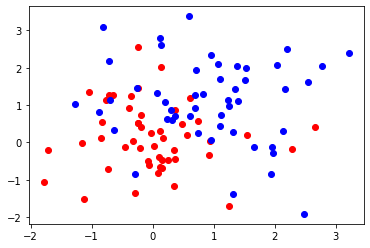

In [138]:
import matplotlib.pyplot as plt
n = 50
points, outcomes = generate_data()
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], "ro")
plt.plot(points[n:, 0], points[n:, 1], "bo")

In [139]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Generate a prediction grid and classify each point."""
    x_min, x_max, y_min, y_max = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return xx, yy, prediction_grid

In [143]:
def plot_prediction_grid (predictors, xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","yellowgreen", "lightskyblue"])
    observation_colormap = ListedColormap (["red","orange","blue"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

In [144]:
print(points.shape)
outcomes.shape

(100, 2)


(100,)

C:\Users\Andrew\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


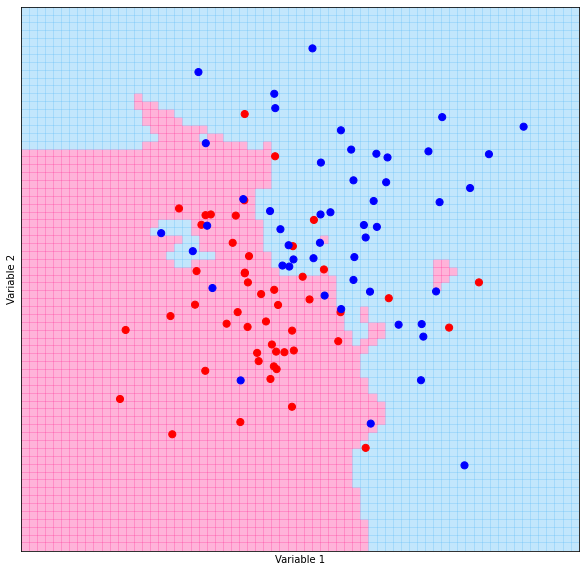

In [145]:
k=5; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(points, outcomes, limits, h, k)
plot_prediction_grid(points, xx, yy, prediction_grid)

C:\Users\Andrew\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


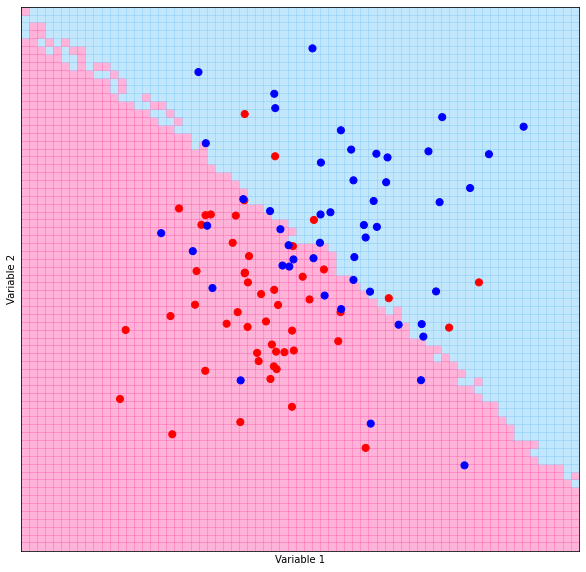

In [146]:
k=50; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(points, outcomes, limits, h, k)
plot_prediction_grid(points, xx, yy, prediction_grid)

C:\Users\Andrew\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


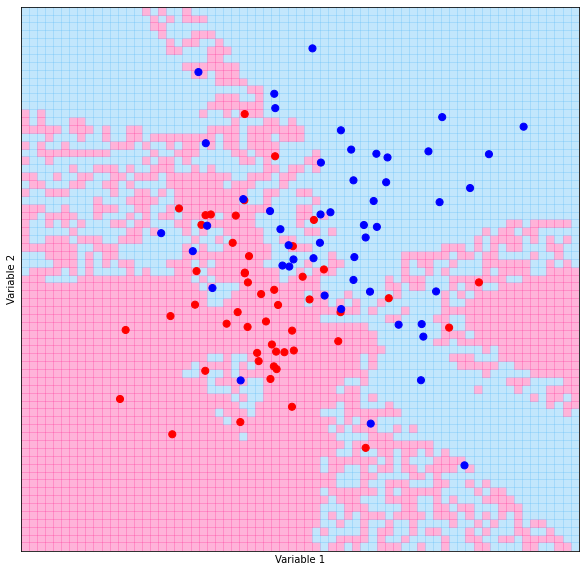

In [147]:
k=2; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(points, outcomes, limits, h, k)
plot_prediction_grid(points, xx, yy, prediction_grid)

In [148]:
# Compare homemade and sklearn on Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
iris["data"].shape

(150, 4)

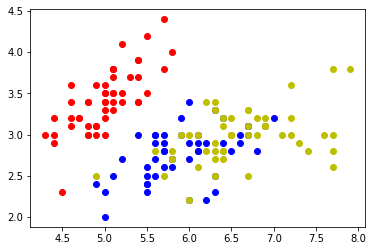

In [149]:
# For computational ease, only consider first two covariates
predictors = iris.data[:, 0:2]
outcomes = iris.target
plt.plot(predictors[outcomes == 0][:,0], predictors[outcomes == 0][:,1], "ro")
plt.plot(predictors[outcomes == 1][:,0], predictors[outcomes == 1][:,1], "bo")
plt.plot(predictors[outcomes == 2][:,0], predictors[outcomes == 2][:,1], "yo")

C:\Users\Andrew\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


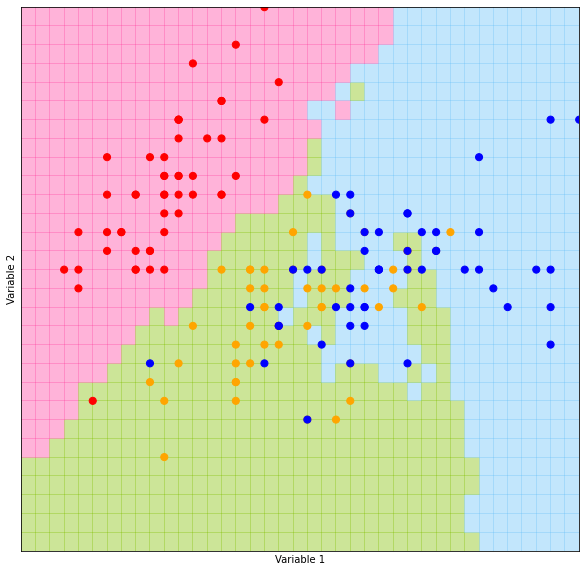

In [150]:
k=5; limits = (4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(predictors, xx, yy, prediction_grid)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)
sk_predictions.shape

(150,)

In [155]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

(150,)

In [156]:
np.mean(sk_predictions == my_predictions)

0.96

In [157]:
np.mean(sk_predictions == outcomes)

0.8333333333333334

In [158]:
np.mean(my_predictions == outcomes)

0.8466666666666667